# install dependencies

In [2]:
!pip3 install inverse-canopy==0.0.21

# **Model Inputs**

In [3]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.1,patience: 50,min_improvement: 0.001,max_steps: 5000,seed: 372
Step 0: Loss = 9.3081264318713828, performing 43.9 it/sec
Step 100: Loss = 1.4568111113063673, performing 261.6 it/sec
Step 200: Loss = 0.3084350391365742, performing 208.3 it/sec
No improvement since Step 215, early stopping.
[Best]  Step 214: Loss = 0.1786705328690757
[Final] Step 264: Loss = 0.1806410090170622

predicted end states
------------------------------------
         5th       Mean      95th
TSHC-1  3.24e-02  3.24e-02  3.24e-02
TSHC-2  3.74e-09  3.75e-09  3.75e-09
TSHC-3  6.47e-04  6.47e-04  6.47e-04
TSHC-4  7.48e-11  7.49e-11  7.50e-11
TSHC-5  1.88e-11  1.89e-11  1.90e-11


predicted conditional events
----------------------------------
       5th       Mean      95th
TSHC  1.00e+00  1.00e+00  1.00e+00
MRSS  1.96e-02  1.96e-02  1.96e-02
DHRS  2.90e-08  2.92e-08  2.93e-08
DHRL  1.16e-07  1.16e-07  1.16e-07




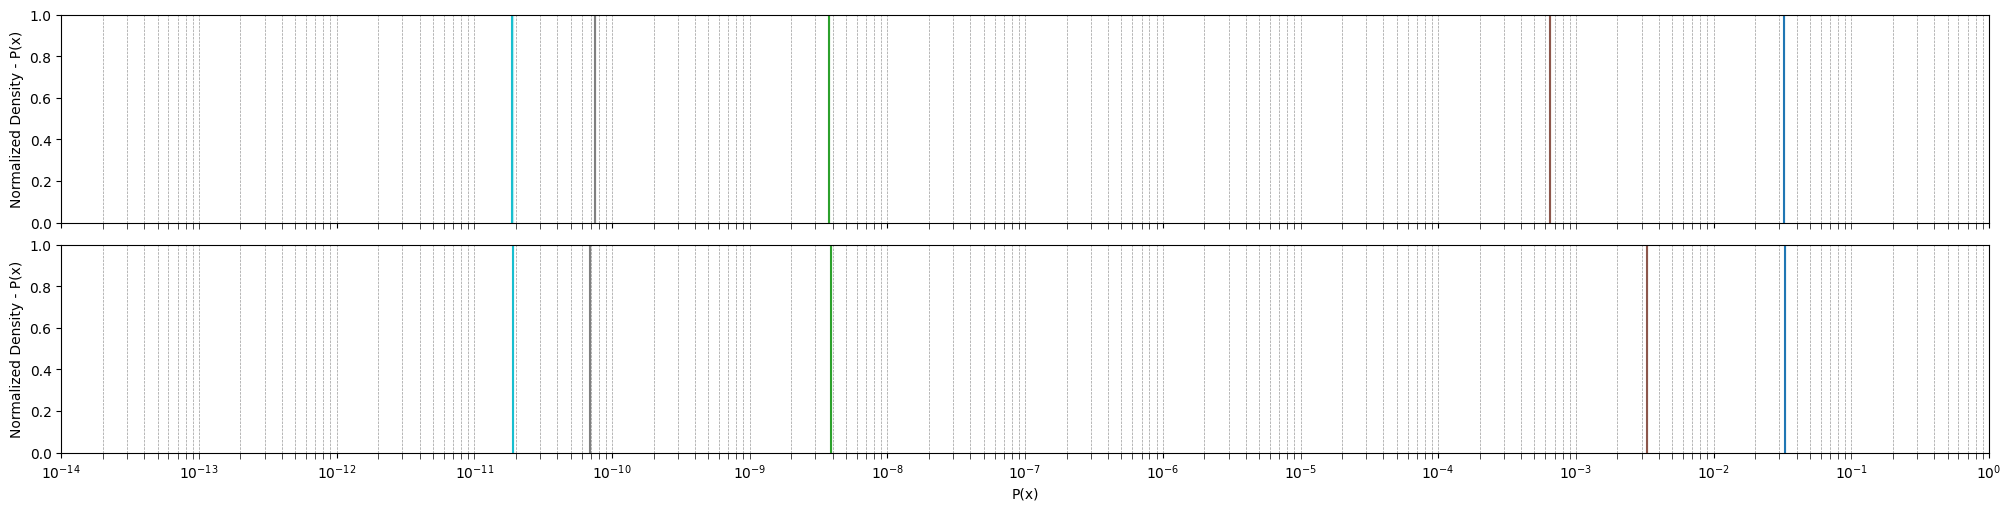

In [4]:
tunable = {
 'num_samples': 100,      # number of monte carlo samples
 'learning_rate': 0.1,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-20,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 5000,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before early stopping if the loss does not improve
 'initiating_event_frequency': 3.3e-2,  # set the initiating event (IE) frequency here
 'freeze_initiating_event': True,       # set to False if you'd like to predict the IE frequency as well
}

conditional_events = {
    'names': ['TSHC', 'MRSS', 'DHRS', 'DHRL'],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    'TSHC-1': {
        'sequence': [1, 0, np.nan, 0],
        'probability': 3.3e-2,
    },
    'TSHC-2': {
        'sequence': [1, 0, np.nan, 1],
        'probability': 3.90e-9,
    },
    'TSHC-3': {
        'sequence': [1, 1, 0, 0],
        'probability': 3.3e-3, # There was no given frequency
    },
    'TSHC-4': {
        'sequence': [1, 1, 0, 1],
        'probability': 6.9e-11,
    },
    'TSHC-5': {
        'sequence': [1, 1, 1, np.nan],
        'probability': 1.9e-11,
    },
    # 'TSHC-0': {
    #     'sequence': [0, np.nan, np.nan, np.nan],
    #     'probability': 1.0 - 5.80e-3 - 1.30e-7 - 1.63e-8 - 2.20e-9 - 1.40e-8, # one minus all the other end-states
    # },
}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_plot=True, show_metrics=False)